# Covid-19

In [58]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline
from datetime import date
import datetime
from jinja2 import Template

In [59]:
import numpy as np
import pandas as pd
from jinja2 import Template
from IPython.display import HTML

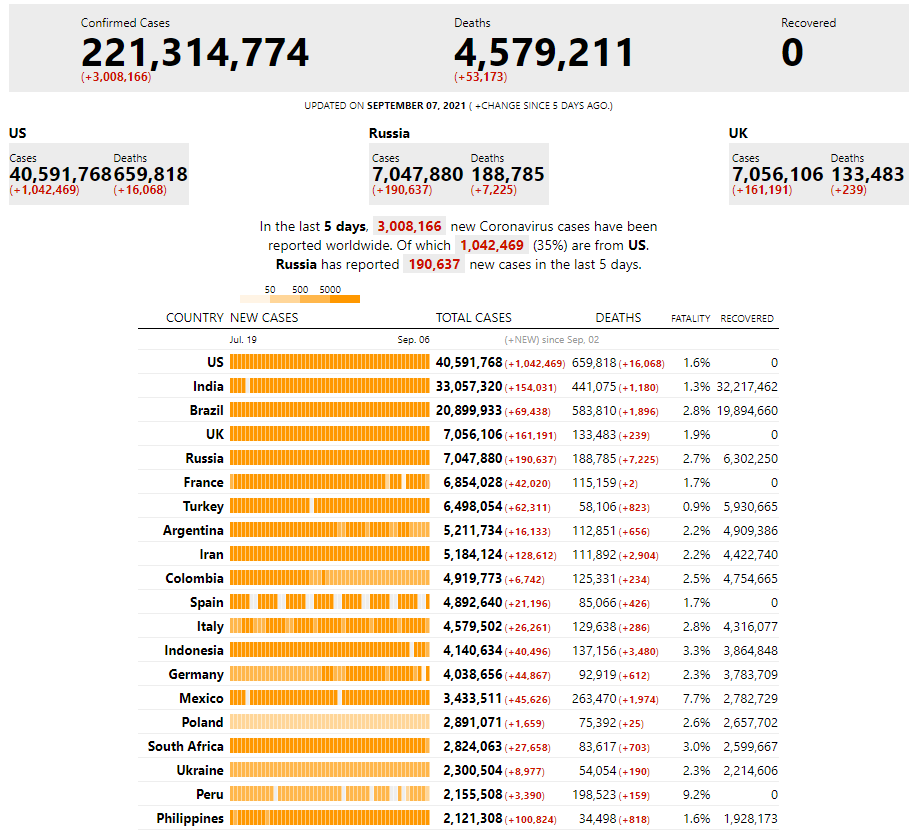

In [60]:
#hide_input
headings= """
<!-- #######  HTML!! #########-->
<h1 style="color: #ff3933; text-align: center;">Covid-19 Matplotlib Overview in India</h1>
<h2 style="color: #3361ff; text-align: center;">Second wave Analysis (from 20th April 2021)</h2>"""
html = HTML(headings)
display(html)

## 주제 : Covid-19 Matplotlib Overview in India

물류 모델 -> 인도 국립 공학  volume 6, pages869-875(2021)이 기사 인용


※ Reference : https://link.springer.com/article/10.1007%2Fs41403-021-00248-5/metrics


데이터는 2020년 1월 30일부터 2021년 4월 20일까지입니다. 
시간 = 1일은 모든 수치에서 2020년 1월 22일에 해당합니다.




## 인도를 선정한 이유
1. 사람이 많이 살아서
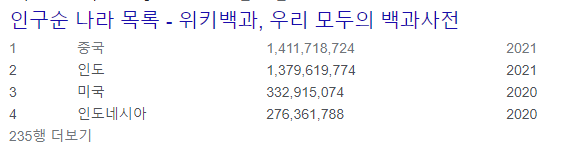


# COVID19-India API

# https://data.covid19india.org/ url 주소 활용

COVID19-India API -> Data Repository

※ Reference(git) : https://github.com/CSSEGISandData/COVID-19


※ Reference(홈페이지) : https://www.mygov.in/covid-19


※ Reference(data) : https://hub.mph.in.gov/dataset?q=COVID

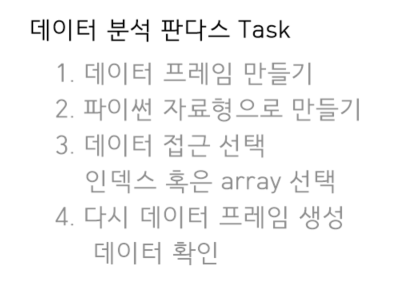

In [27]:
#hide
# 데이터 오브젝트 생성
# 1.  COVID19-India API 사용
# 2.  데이터 프레임 csv 에서 불러오기 
#     (pd .read_ csv 클래스 생성자를 사용하여 ['Date','State','Confirmed','Deceased'] 추가)
# 3. 확인할 데이터 클래스로 추가
# 4. df_cases = df_cases.groupby('Date') 확진자
# 5. df_deaths = df_deaths.groupby('Date') 사망자

df  = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
df = df[['Date','State','Confirmed','Deceased']]
df = df.rename(columns={'Confirmed':'Cases', "Deceased":'Deaths'})
df_cases = df[["Date",'State','Cases']]
df_deaths = df[['Date','State','Deaths']]
df_cases1 = df_cases.groupby('Date')
df_deaths1= df_deaths.groupby('Date')

In [28]:
#hide
df_cases1.head()

,Date,State,Cases
0,2020-01-30,Kerala,1
1,2020-01-30,India,1
2,2020-02-02,Kerala,2
3,2020-02-02,India,2
4,2020-02-03,Kerala,3
...,...,...,...
19640,2021-09-07,Andaman and Nicobar Islands,7573
19641,2021-09-07,Andhra Pradesh,2023242
19642,2021-09-07,Arunachal Pradesh,53474
19643,2021-09-07,Assam,593087


#### 데이터 프레임 생성
#### 데이터 확인하기
##### head()와 tail() -> ()안에 숫자를 넣으면 숫자에 맞게 데이터를 보여준다.

In [29]:
#hide
df_cases1.get_group('2020-04-20').head()

,Date,State,Cases
1181,2020-04-20,Andaman and Nicobar Islands,16
1182,2020-04-20,Andhra Pradesh,722
1183,2020-04-20,Arunachal Pradesh,1
1184,2020-04-20,Assam,35
1185,2020-04-20,Bihar,113


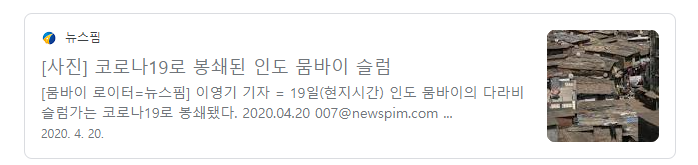
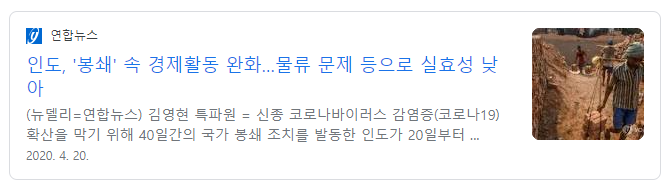
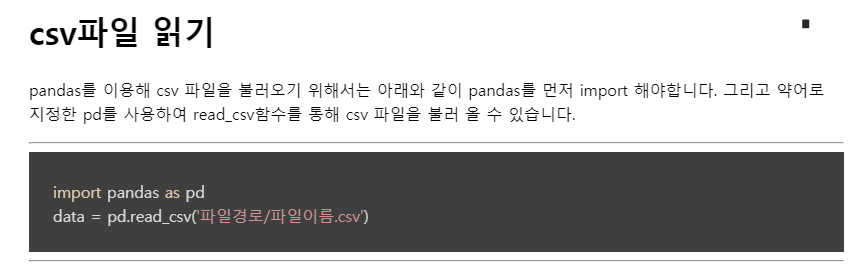

In [30]:
#hide
df_snap = pd.read_csv('data/SnapshotCases-28-July.csv') # 확인할 데이터 읽기
arr_states = df_snap['states'].unique() #states 유니크 값 가저오기 중복 제거
arr_dates = df['Date'].unique() # 데이터를 겹치지 않게 하기위해 사용
df_snap = df_snap.set_index('states') # 인덱스 리셋 배정 컬럼명으로 인덱스 설정 (엑셀 필터 생각)
df_snap.head() # 데이터 확인

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
states,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,...,199,203,208,217,236,255,286,314,334,359
Andhra Pradesh,1,1,1,1,1,3,3,5,6,7,...,49650,53724,58668,64713,72711,80858,88671,96298,102349,110297
Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,...,740,790,858,949,991,1056,1126,1158,1239,1330
Assam,0,0,0,0,0,0,0,0,0,0,...,23898,24991,26671,27643,28690,29820,30985,32127,33475,34846
Bihar,0,0,0,0,0,0,0,0,2,3,...,26379,27455,28564,30066,31691,33511,36314,38919,41111,43591


In [31]:
#hide
arr_states[-9] = 'Puducherry' #인도에 수도이다.csv에서 인덱스 값을 배정함
arr_states[-10] = 'Odisha' #평균 소득은 낮으나 1차산업 발달 되어 있음
arr_states[6] = 'Dadra and Nagar Haveli and Daman and Diu' # 인구는 22만 명 면적에 비해 인구 많음
arr_states = np.append(arr_states,np.array(['Chhattisgarh','Ladakh','Uttarakhand'])) # 인도 중앙 부에 있는 도시
arr_states
# 도시별로 인덱스 값을 가저와 딕셔너리로 변환
# 딕셔너리 만들기위한 작업 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Ladakh', 'Uttarakhand'],
      dtype=object)

In [38]:
#hide
# 가저온 딕셔너리 값을 pd 데이터 프레임으로 바꿈
dates = []
for i in arr_dates:
    if i>='2021-04-20': # 2021-04-20 이상의 값을 저장
        dates.append(i) #  i 만듬
dict = {'states':dates} # dares를 dict을 사용하여 데이터 프레임 만듬
for i in arr_states: #도시별 딕셔너리 값을 반복문을 통해 값을 가저옴
    dict[i] = [0]*len(dates) # len 사용해 인덱스 0 ~ 검색 시작
dft_cases = pd.DataFrame(dict)  # 케이스 데이터 프레임 생성
dft_deaths = pd.DataFrame(dict) # 사망자 데이터 프레임 생성
dft_deaths.head() # 데이터 확인

,states,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,West Bengal,Chhattisgarh,Ladakh,Uttarakhand
0,2021-04-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-04-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-04-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-04-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-04-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#hide
for i in range(len(dates)): # dates를 통해 최근 날짜기준으로 데이터 검색
    df1_deaths = df_deaths1.get_group(dates[i]) # 사망자 데이터 프레임을 튜플로 그룸으로 만듬
    for j in range(len(df1_deaths.index)): # 사망자 인덱스 값 검색
        if df1_deaths.iloc[j,1] in arr_states: # 위의 반복문이 인덱스 값이니 -> iloc 사용 
            dft_deaths.loc[i,df1_deaths.iloc[j,1]] = df1_deaths.iloc[j,2]
dft_deaths = dft_deaths.set_index('states') # 지역(states) -> 인덱스 값을 데이터 프레임 으로 만듬
df1_deaths.head() # 데이터 확인 

,Date,State,Deaths
19640,2021-09-07,Andaman and Nicobar Islands,129
19641,2021-09-07,Andhra Pradesh,13935
19642,2021-09-07,Arunachal Pradesh,268
19643,2021-09-07,Assam,5719
19644,2021-09-07,Bihar,9656


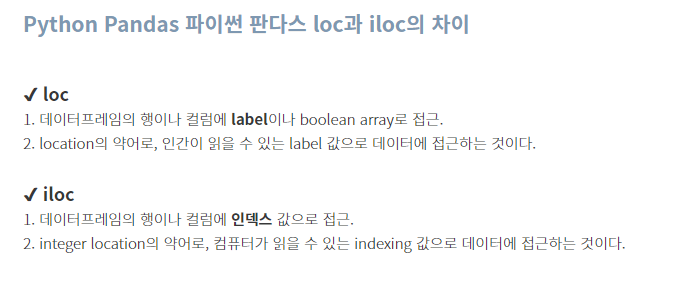

※   https://gagadi.tistory.com/16

In [ ]:
#hide
# 2021 04 20 부터 2021 09 02 까지 데이터 불러오기
for i in range(len(dates)):
    df1_cases = df_cases1.get_group(dates[i])# 지역를 데이터 프레임을 튜플로 그룸으로 만듬
    for j in range(len(df1_cases.index)): # 인덱스 값 검색
        if df1_cases.iloc[j,1] in arr_states:
            dft_cases.loc[i,df1_cases.iloc[j,1]] = df1_cases.iloc[j,2]
dft_cases = dft_cases.set_index('states')

In [11]:
#hide
dft_cases = dft_cases.T
dft_deaths = dft_deaths.T
dt_today = dates[-1]
dt_yday = dates[-2]
dft_deaths.head()

states,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,...,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02
Andaman and Nicobar Islands,64,64,65,65,66,66,66,66,67,67,...,129,129,129,129,129,129,129,129,129,129
Andhra Pradesh,7472,7510,7541,7579,7616,7685,7736,7800,7871,7928,...,13750,13766,13778,13788,13807,13825,13838,13857,13867,13877
Arunachal Pradesh,56,56,56,56,56,58,58,58,58,59,...,259,259,260,260,260,260,260,260,260,260
Assam,1145,1150,1160,1172,1186,1200,1215,1233,1255,1281,...,5600,5607,5618,5627,5636,5640,5655,5660,5671,5671
Bihar,1841,1897,1956,2010,2087,2155,2222,2307,2391,2480,...,9650,9650,9650,9652,9653,9653,9653,9653,9653,9653


In [12]:
#hide
# DataFrame 축을 나타내는 목록을 반환
dft_cases = dft_cases.reset_index()
dft_deaths = dft_deaths.reset_index()
dft_cases = dft_cases.rename(columns = {'index':'state'})
dft_deaths = dft_deaths.rename(columns = {'index':'state'})
dft_deaths.head()

states,state,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,...,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02
0,Andaman and Nicobar Islands,64,64,65,65,66,66,66,66,67,...,129,129,129,129,129,129,129,129,129,129
1,Andhra Pradesh,7472,7510,7541,7579,7616,7685,7736,7800,7871,...,13750,13766,13778,13788,13807,13825,13838,13857,13867,13877
2,Arunachal Pradesh,56,56,56,56,56,58,58,58,58,...,259,259,260,260,260,260,260,260,260,260
3,Assam,1145,1150,1160,1172,1186,1200,1215,1233,1255,...,5600,5607,5618,5627,5636,5640,5655,5660,5671,5671
4,Bihar,1841,1897,1956,2010,2087,2155,2222,2307,2391,...,9650,9650,9650,9652,9653,9653,9653,9653,9653,9653


In [13]:
#hide
# 지역 별로 사망자 합 
dfc_cases = dft_cases.groupby('state')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('state')[dt_today].sum()
dfp_cases = dft_cases.groupby('state')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('state')[dt_yday].sum()
dfc_cases.head()

state
Andaman and Nicobar Islands       7567
Andhra Pradesh                 2016680
Arunachal Pradesh                53102
Assam                           589999
Bihar                           725718
Name: 2021-09-02, dtype: int64

In [14]:
#hide
# 지역 별로 사망자 내림차순
df_table = pd.DataFrame({'states': dfc_cases.index, 'Cases': dfc_cases.values, 'Deaths': dfc_deaths.values, 'PCases': dfp_cases.values, 'PDeaths': dfp_deaths.values}).set_index('states')
df_table = df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,6469332,137496,6469332,137496
1,Kerala,4122133,21149,4090036,20961
2,Karnataka,2951844,37361,2950604,37339
3,Tamil Nadu,2617943,34961,2616381,34941
4,Andhra Pradesh,2016680,13877,2015302,13867


In [63]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

NameError: name 'df_table' is not defined

In [64]:
#hide
df_table.head()

NameError: name 'df_table' is not defined

In [65]:
#hide
summary = {'updated':dates[-1], 'since':dates[-2]}
list_names = ['Cases', 'PCases', 'Deaths', 'PDeaths', 'Cases (+)', 'Deaths (+)']
for name in list_names:
    summary[name] = df_table.sum()[name]
summary

NameError: name 'df_table' is not defined

In [66]:
#hide
overview = """
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<h2 style="color: #ff337d; text-align: center;">Last update: <strong>{update}</strong></h2>
<h3 style="text-align: center;">Confirmed cases:</h3>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<h3 style="text-align: center;">Confirmed deaths:</h3>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>"""

In [67]:
#hide_input
# 시각화 준비 
update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew));

display(html);

KeyError: 'Cases'

In [68]:
#hide
dt_cols = list(dft_cases.columns[1:])
#print(dt_cols)
dft_ct_new_cases = dft_cases.groupby('state')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
#print(dft_ct_new_cases.head())
dft_ct_new_cases.sort_values(by = dates[-1], ascending = False,inplace = True)

KeyError: 'state'

In [21]:
#hide
dft_ct_new_cases.head()

states,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,...,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02
state,,,,,,,,,,,,,,,,,,,,,
Kerala,0,22414,26995,28447,26685,28469,21890,32819,35013,38607,...,24296,31445,30077,32801,31265,29836,19622,30203,32803,32097
Tamil Nadu,0,11681,12652,13776,14842,15659,15684,15830,16665,17897,...,1585,1573,1559,1542,1551,1538,1523,1512,1509,1562
Andhra Pradesh,0,9716,10759,11766,11698,12634,9881,11434,14669,14792,...,1248,1601,1539,1515,1321,1557,878,1115,1186,1378
Karnataka,0,23558,25795,26962,29438,34804,29744,31830,39047,35024,...,1259,1224,1213,1301,1229,1262,973,1217,1159,1240
Mizoram,0,90,73,62,63,105,22,103,228,138,...,845,740,794,905,888,878,440,1157,880,1111


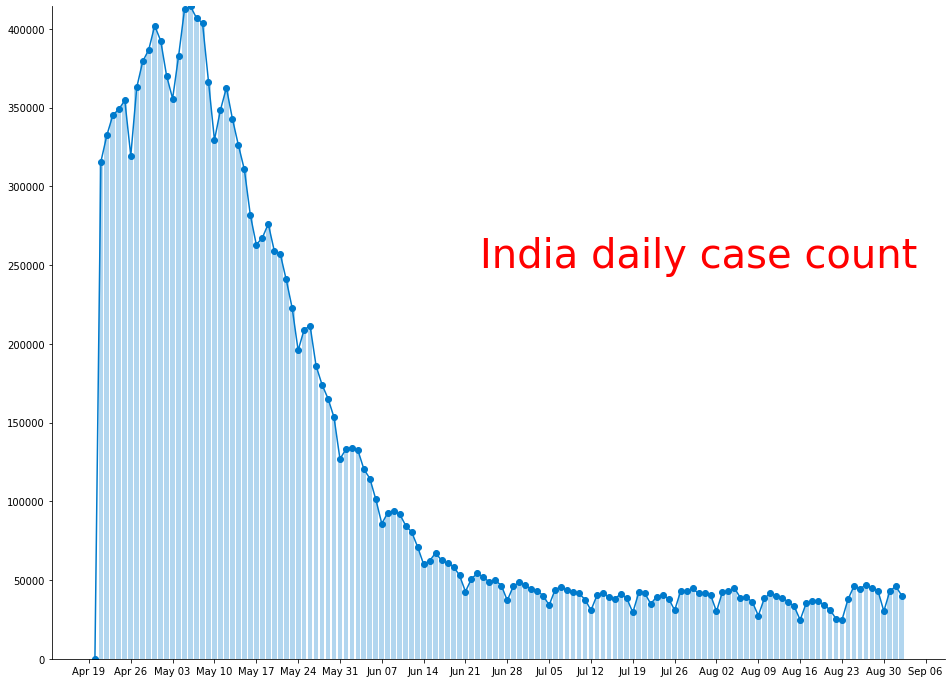

In [22]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

fig,ax1 = plt.subplots(figsize = (16,12))

ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.48, 0.6,'India daily case count', transform = ax1.transAxes,fontsize=40,color='#ff0000');
ax1.set_ylim([min(ef.Total),max(ef.Total)])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

In [23]:
#hide_input
create= """
<!-- #######  HTML!! #########-->
<h1 style="color: #ff004c; text-align: center;">Analysis of top-10 States in covid cases</h1>
"""
html = HTML(create)
display(html)

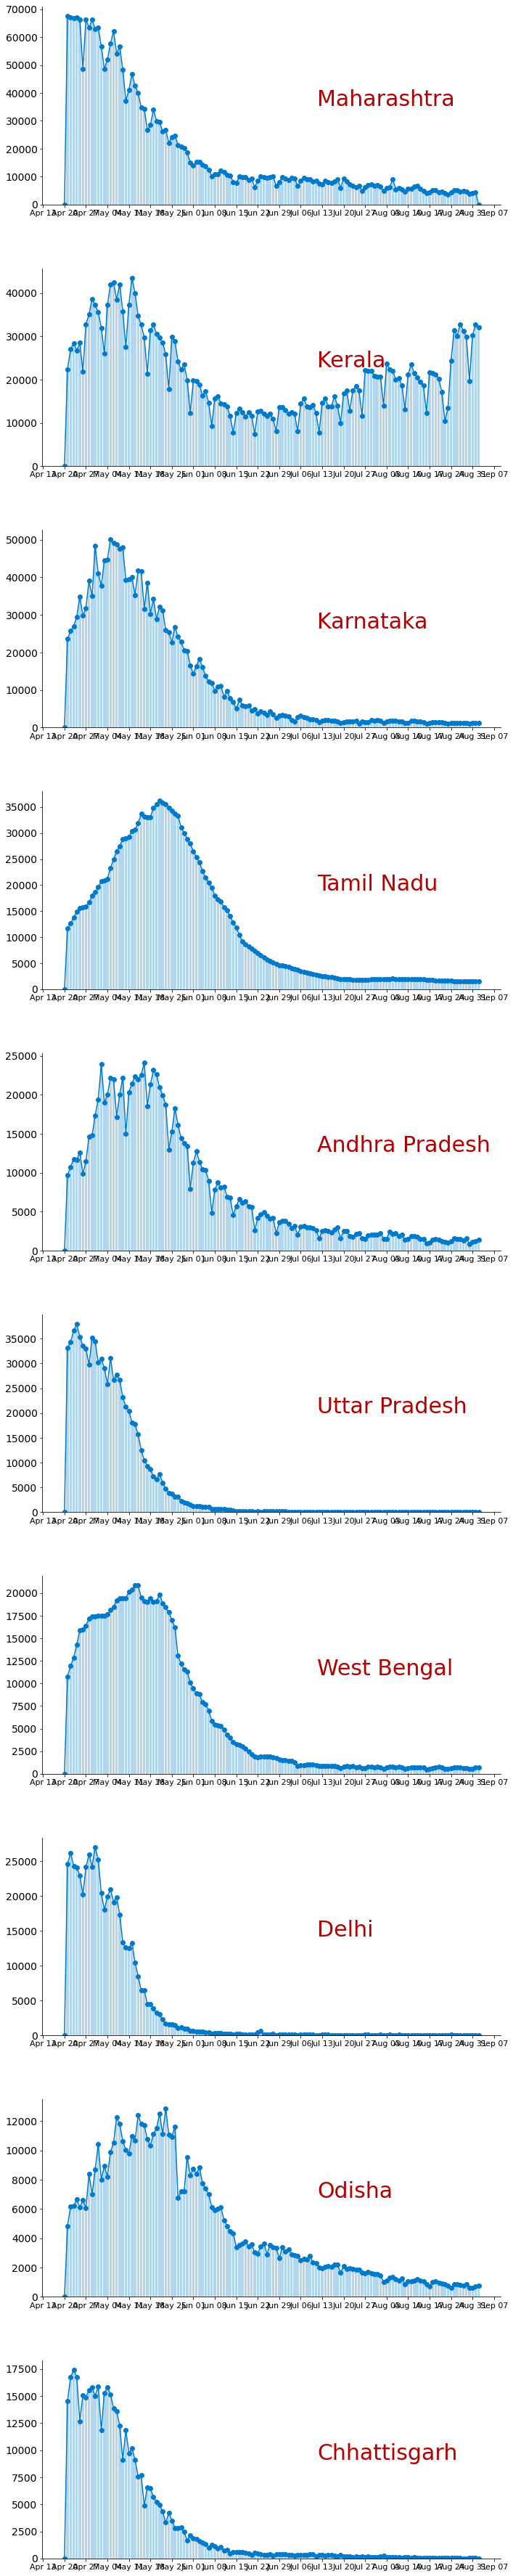

In [24]:
#hide_input
n=10
ax=[]
fig = plt.figure(figsize = (10,50))
gs = fig.add_gridspec(60,20)
arr=df_table.iloc[:10,0].values
count=0
for i in range(len(arr)): # df_table.iloc[:10,0] 값을 반복문을 통해 검색
    ax.append(fig.add_subplot(gs[count:count+5,:]))
    ef = df.loc[arr[i]].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date.values,ef.iloc[:,-1].values,color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.6,0.5,f'{arr[i]}',transform = ax[i].transAxes, fontsize = 30,color='#b30000');
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    count+=6
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label1.set_fontsize(11)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)

plt.tight_layout()


In [25]:
#hide_input
fr= df_table['Fatality Rate'].values
ma,mi=max(fr),min(fr)
# 함수로 지정
def max_and_min(df_2,ft): # max min 함수 지정
    for i in range(len(ft)):
        if df_2.iloc[i,-3]==ma:
            state_max=[df_2.iloc[i,0],df_2.iloc[i,-3]]
        elif df_2.iloc[i,-3]==mi:
            state_min=[df_2.iloc[i,0],df_2.iloc[i,-3]]
    return state_max,state_min

x = df_table['Cases (+)'].sum()
y=df_table['Deaths (+)'].sum()
df_table['% Cases (+)']= ((df_table['Cases (+)']/x)*100).round(2)
df_table['% Deaths (+)']=((df_table['Deaths (+)']/y)*100).round(2)
print(df_table.to_string(index=False))

                                   states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate  % Cases (+)  % Deaths (+)
                              Maharashtra  6469332  137496  6469332   137496          0           0           2.13         0.00          0.00
                                   Kerala  4122133   21149  4090036    20961      32097         188           0.51        79.99         66.67
                                Karnataka  2951844   37361  2950604    37339       1240          22           1.27         3.09          7.80
                               Tamil Nadu  2617943   34961  2616381    34941       1562          20           1.34         3.89          7.09
                           Andhra Pradesh  2016680   13877  2015302    13867       1378          10           0.69         3.43          3.55
                            Uttar Pradesh  1709351   22825  1709351    22825          0           0           1.34         0.00          0.00
      

In [26]:
#hide_input
a,b=max_and_min(df_table,fr)
fatality=f"""
<!-- #######  HTML!! #########-->
<h1 style="color: #ff004c; text-align: center;">{a[0]} has highest Fatality rate ({a[1]})</h1>
<h1 style="color: #ff004c; text-align: center;">{b[0]} has lowest Fatality rate ({b[1]})</h1>"""

html = HTML(fatality)
display(html)